## crop yield prediction

Crop yield prediction plays a crucial role in agriculture and food 
production. Farmers, policymakers, and agricultural researchers need accurate 
predictions of crop yields to make informed decisions

In [ ]:
import numpy as np 
import pandas as pd

In [2]:
df_yield = pd.read_csv('yield_df.csv')
df_yield.shape

(28242, 8)

In [3]:
df_yield.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df_yield.tail(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28232,28232,Zimbabwe,Sweet potatoes,2012,22222,657.0,3375.53,20.52
28233,28233,Zimbabwe,Wheat,2012,24420,657.0,3375.53,20.52
28234,28234,Zimbabwe,Cassava,2013,46000,657.0,2550.07,19.76
28235,28235,Zimbabwe,Maize,2013,7449,657.0,2550.07,19.76
28236,28236,Zimbabwe,Potatoes,2013,165714,657.0,2550.07,19.76
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [5]:
df_yield.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

Removing unnecessary columnsform the data set

In [6]:

df_yield = df_yield.drop(['Unnamed: 0',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Albania,Maize,1990,36613
1,Albania,Potatoes,1990,66667
2,Albania,"Rice, paddy",1990,23333
3,Albania,Sorghum,1990,12500
4,Albania,Soybeans,1990,7000


In [7]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         28242 non-null  object
 1   Item         28242 non-null  object
 2   Year         28242 non-null  int64 
 3   hg/ha_yield  28242 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 882.7+ KB


####mmm

In [8]:
df_yield.describe()

,Year,hg/ha_yield
count,28242.000000,28242.000000
mean,2001.544296,77053.332094
std,7.051905,84956.612897
min,1990.000000,50.000000
25%,1995.000000,19919.250000
50%,2001.000000,38295.000000
75%,2008.000000,104676.750000
max,2013.000000,501412.000000


## we need the rainfall rate for the year , Pesticides,Average Temprature and this data we have to merge with the yield data set

In [9]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [10]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


Convert to object to float values of average rain fall mmper year

In [11]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [12]:
df_rain.isna().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

In [13]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.000000
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [14]:
df_rain = df_rain.dropna()

we are getting error while merging data due to names are different in Area name in both rain and yield data set so we hgave to correct it.

In [15]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [16]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [17]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Albania,Maize,1990,36613,1485.0
1,Albania,Potatoes,1990,66667,1485.0
2,Albania,"Rice, paddy",1990,23333,1485.0
3,Albania,Sorghum,1990,12500,1485.0
4,Albania,Soybeans,1990,7000,1485.0
...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0
28238,Zimbabwe,Sorghum,2013,3066,657.0
28239,Zimbabwe,Soybeans,2013,13142,657.0
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0


In [18]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
dtype: int64

In [19]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,28242.000000,28242.000000,28242.00000
mean,2001.544296,77053.332094,1149.05598
std,7.051905,84956.612897,709.81215
min,1990.000000,50.000000,51.00000
25%,1995.000000,19919.250000,593.00000
50%,2001.000000,38295.000000,1083.00000
75%,2008.000000,104676.750000,1668.00000
max,2013.000000,501412.000000,3240.00000


Pesticides Data:

In [20]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [21]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [22]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [23]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(28242, 6)

In [24]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [25]:
yield_df.dropna()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.00
1,Albania,Potatoes,1990,66667,1485.0,121.00
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00
3,Albania,Sorghum,1990,12500,1485.0,121.00
4,Albania,Soybeans,1990,7000,1485.0,121.00
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07


In [26]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
dtype: int64

Average Temprature:

In [27]:
avg_temp=  pd.read_csv('temp.csv')

In [28]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [29]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [31]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [32]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [33]:

yield_df.shape

(186094, 7)

In [34]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,186094.000000,186094.000000,186094.000000,186094.000000,186094.000000
mean,2001.462605,80332.936425,1142.587096,58963.395172,22.996121
std,7.063155,89403.065039,525.943513,68504.571020,5.072132
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19125.000000,758.000000,27422.770000,20.310000
50%,2001.000000,31874.000000,1083.000000,44957.520000,25.360000
75%,2008.000000,113463.000000,1083.000000,61732.110000,26.400000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [35]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## we prepared a data set avaialble with all labels from other data sets 
## Know we have to apply Data exploration

In [36]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,17455,17455,17455,17455,17455,17455
Maize,24683,24683,24683,24683,24683,24683
Plantains and others,786,786,786,786,786,786
Potatoes,25298,25298,25298,25298,25298,25298
"Rice, paddy",23030,23030,23030,23030,23030,23030
Sorghum,21041,21041,21041,21041,21041,21041
Soybeans,23557,23557,23557,23557,23557,23557
Sweet potatoes,21938,21938,21938,21938,21938,21938
Wheat,24143,24143,24143,24143,24143,24143


In [37]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,186094.000000,186094.000000,186094.000000,186094.000000,186094.000000
mean,2001.462605,80332.936425,1142.587096,58963.395172,22.996121
std,7.063155,89403.065039,525.943513,68504.571020,5.072132
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19125.000000,758.000000,27422.770000,20.310000
50%,2001.000000,31874.000000,1083.000000,44957.520000,25.360000
75%,2008.000000,113463.000000,1083.000000,61732.110000,26.400000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [38]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             7203247128
Brazil            1843053366
Mexico            1046308224
Japan              746825472
Pakistan           665076906
Australia          654666372
Indonesia          415161036
United Kingdom     277099950
Turkey             261319750
Canada             208241532
Name: hg/ha_yield, dtype: int64

In [39]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

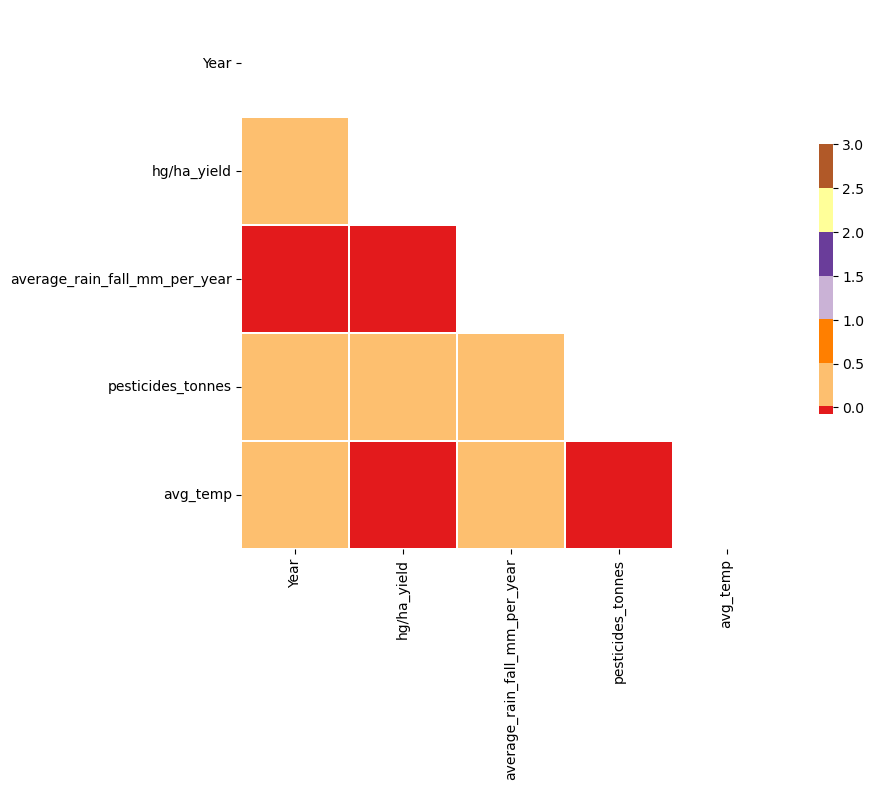

In [40]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)

mask[np.triu_indices_from(mask)] =True

f,ax = plt.subplots(figsize=(10,7))

cmap = sns.palette="Paired"

sns.heatmap(correlation_data, mask=mask,cmap =cmap, vmax=3,center =0, 
            square=True,linewidths =0.3,cbar_kws ={"shrink":0.5})
                                                                            




It can be seen from the above correlation map that there is 0 and 0.5 means no correlation between any of the colmuns in the dataframe. 

# Data Preprocessing

In [41]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
features = features.drop(['Year'], axis=1)

In [45]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186094 entries, 0 to 186093
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 25.4 MB


In [46]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Scaling Features:

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [48]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

Training Data:

In [49]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

In [50]:
from sklearn.metrics import r2_score
from concurrent.futures import ThreadPoolExecutor
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_data,train_labels)
    y_pred = fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor


In [52]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size at each iteration
    max_depth=3,        # Maximum depth of individual regression estimator           # Loss function to optimize (least squares)
)

In [53]:
gb_regressor.fit(train_data, train_labels)

GradientBoostingRegressor()

In [54]:
predictions = gb_regressor.predict(test_data)

In [55]:
predictions

array([ 90424.23331658,  70683.99324829,  26611.41438534, ...,
       281380.2188687 ,  21813.55308199,  13371.35757368])

In [56]:
rd_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of boosting stages (trees)
      # Step size at each iteration
    max_depth=3,        # Maximum depth of individual regression estimator           # Loss function to optimize (least squares)
)

In [57]:
rd_regressor.fit(train_data, train_labels)

RandomForestRegressor(max_depth=3)

In [58]:
predictions1 = gb_regressor.predict(test_data)

In [59]:
predictions1

array([ 90424.23331658,  70683.99324829,  26611.41438534, ...,
       281380.2188687 ,  21813.55308199,  13371.35757368])

In [60]:
r2=r2_score(test_labels,predictions)
r2

0.9312751361054552

In [61]:
r2=r2_score(test_labels,predictions1)
r2

0.9312751361054552

In [62]:
models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [63]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [64]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [66]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.536218,0.346908,0.557411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.203512,0.094977,0.140716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.323612,0.151015,0.819761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.323612,0.133659,0.886542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.323612,0.118876,0.790460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.536218,0.346908,0.557411
1,0.203512,0.094977,0.140716
2,0.323612,0.151015,0.819761
3,0.323612,0.133659,0.886542
4,0.323612,0.118876,0.790460


In [68]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.536218,0.346908,0.557411,Brazil,Yams
1,0.203512,0.094977,0.140716,Germany,Maize
2,0.323612,0.151015,0.819761,India,Maize
3,0.323612,0.133659,0.886542,India,Maize
4,0.323612,0.118876,0.790460,India,Sweet potatoes


In [69]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
# test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

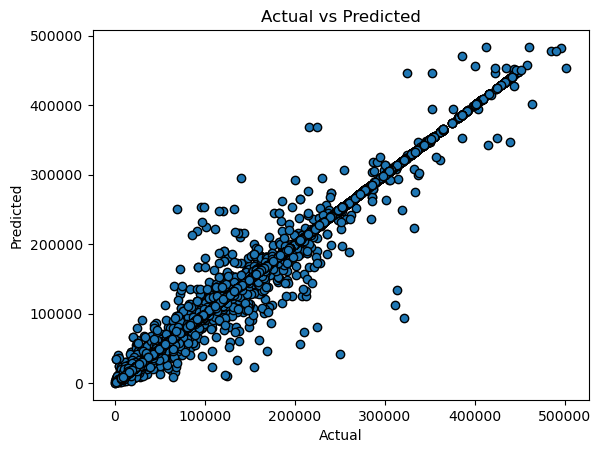

In [70]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Model Results & Conclusions

In [71]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

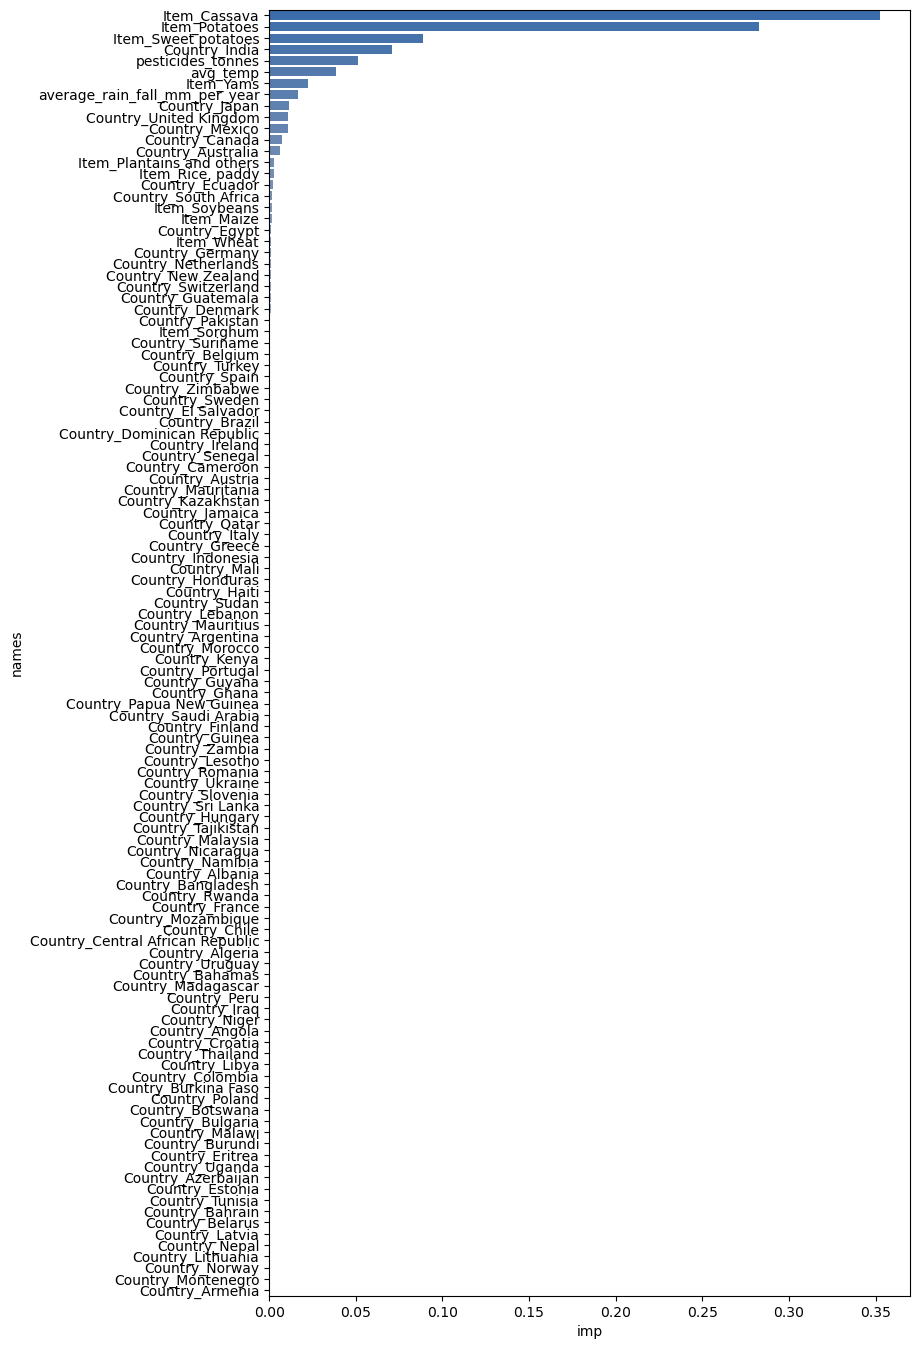

In [72]:
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

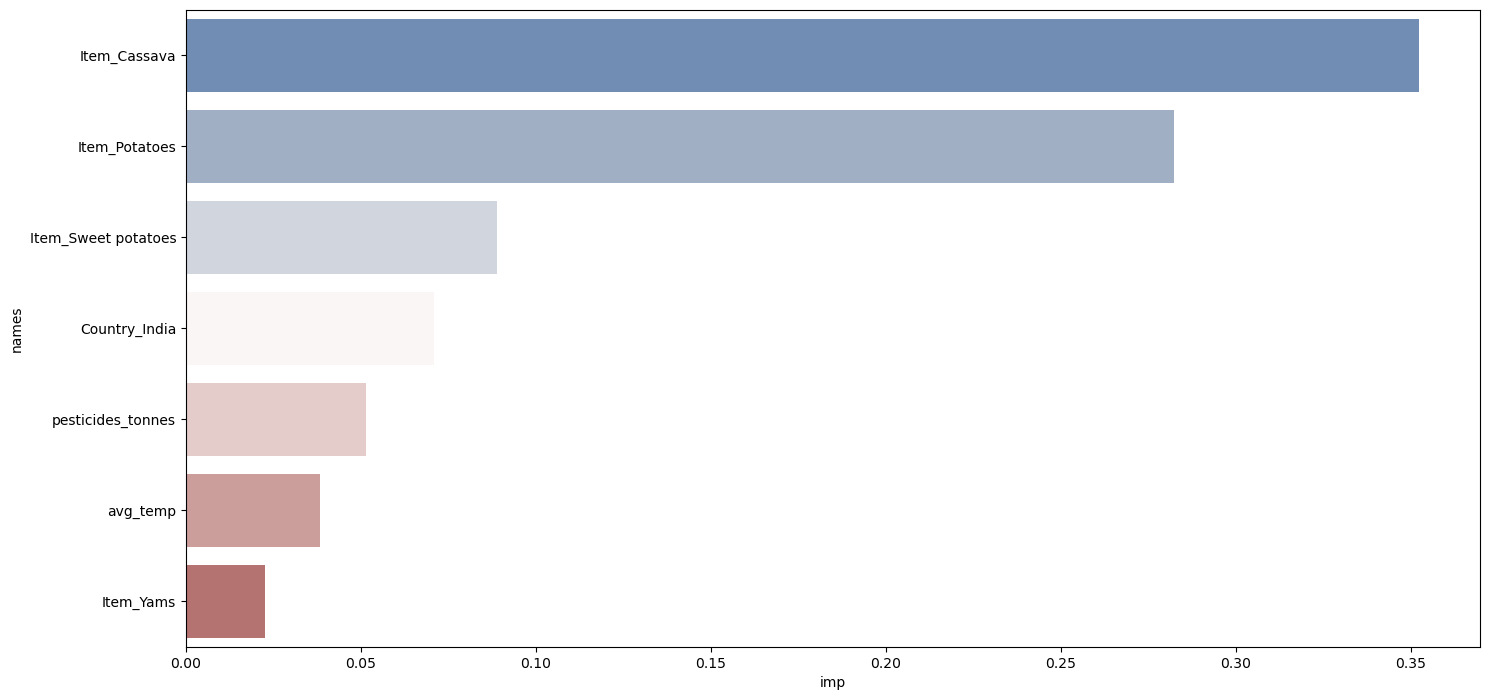

In [73]:
#7 most important factors that affect crops 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

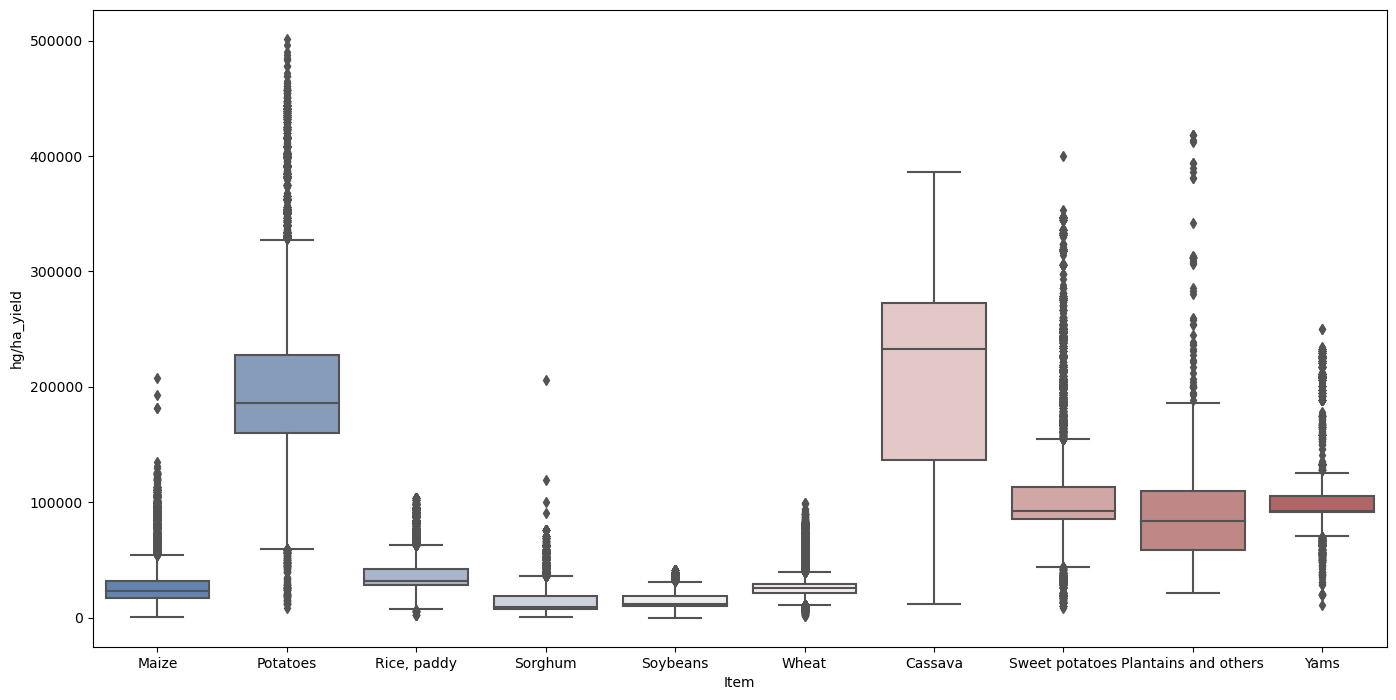

In [74]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);